In [178]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc

%matplotlib inline
%config InlineBackend.figure_format='retina'

sns.set(style='whitegrid', palette='muted', font_scale=1.5)

rcParams['figure.figsize'] = 16, 10

RANDOM_SEED = 42

np.random.seed(RANDOM_SEED)
tf.random.set_seed(RANDOM_SEED)

In [179]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0, 1))

tsla_training_complete = pd.read_csv(r'./data/TSLA_5Y.csv')
tsla_training_processed_complete = tsla_training_complete.iloc[:, 1:2].values
tsla_training_scaled_complete = scaler.fit_transform(tsla_training_processed_complete)


In [180]:
# plt.plot(time, sin, label='sine (with noise)');
# plt.legend();

# Data Preprocessing

In [181]:
df = pd.DataFrame(tsla_training_scaled_complete, columns=['open'])
df.head(11)

df_original = pd.DataFrame(tsla_training_processed_complete, columns=['open'])
df_original.head(11)

,open
0,194.389999
1,188.460007
2,191.149994
3,193.750000
4,188.949997
5,192.000000
6,195.429993
7,194.960007
8,202.000000
9,197.449997


In [182]:
train_size = int(len(df) * 0.8)
test_size = len(df) - train_size

train, test = df.iloc[0:train_size], df.iloc[train_size:len(df)]
print(len(train), len(test))

train_original, test_original = df_original.iloc[0:train_size], df_original.iloc[train_size:len(df_original)]

test.head()

1007 252


,open
1007,0.172291
1008,0.180752
1009,0.184554
1010,0.181239
1011,0.192184


In [183]:
def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X.iloc[i:(i + time_steps)].values
        Xs.append(v)        
        ys.append(y.iloc[i + time_steps])
    return np.array(Xs), np.array(ys)

In [184]:
time_steps = 60

# reshape to [samples, time_steps, n_features]

X_train, y_train = create_dataset(train, train.open, time_steps)
X_test, y_test = create_dataset(test, test.open, time_steps)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(947, 60, 1) (947,)
(192, 60, 1) (192,)


# Modeling

In [185]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout

model = keras.Sequential()
# model.add(keras.layers.LSTM(128, input_shape=(X_train.shape[1], X_train.shape[2])))
# model.add(keras.layers.Dense(1))

model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50))
model.add(Dropout(0.2))

model.add(Dense(units = 1))

# model.compile(loss='mean_squared_error', optimizer=keras.optimizers.Adam(0.001))
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

## Training

In [186]:
history = model.fit(
    X_train, y_train, 
    epochs=100, 
    batch_size=32, 
    validation_split=0.1, 
    verbose=1
)


Train on 852 samples, validate on 95 samples
Epoch 1/100
852/852 [==============================] - 18s 22ms/sample - loss: 0.0057 - val_loss: 0.0028
Epoch 2/100
852/852 [==============================] - 8s 9ms/sample - loss: 0.0017 - val_loss: 0.0015
Epoch 3/100
852/852 [==============================] - 8s 9ms/sample - loss: 0.0011 - val_loss: 0.0013
Epoch 4/100
852/852 [==============================] - 8s 9ms/sample - loss: 0.0011 - val_loss: 0.0014
Epoch 5/100
852/852 [==============================] - 8s 9ms/sample - loss: 0.0010 - val_loss: 0.0015
Epoch 6/100
852/852 [==============================] - 9s 10ms/sample - loss: 0.0011 - val_loss: 0.0014
Epoch 7/100
852/852 [==============================] - 9s 10ms/sample - loss: 0.0010 - val_loss: 0.0016
Epoch 8/100
852/852 [==============================] - 9s 11ms/sample - loss: 9.6632e-04 - val_loss: 0.0012
Epoch 9/100
852/852 [==============================] - 9s 10ms/sample - loss: 9.0262e-04 - val_loss: 0.0012
Epoch 10/100
8

852/852 [==============================] - 8s 9ms/sample - loss: 2.6638e-04 - val_loss: 3.3130e-04
Epoch 75/100
852/852 [==============================] - 8s 9ms/sample - loss: 2.6764e-04 - val_loss: 3.0389e-04
Epoch 76/100
852/852 [==============================] - 8s 9ms/sample - loss: 2.6479e-04 - val_loss: 3.0079e-04
Epoch 77/100
852/852 [==============================] - 8s 10ms/sample - loss: 3.1070e-04 - val_loss: 2.9499e-04
Epoch 78/100
852/852 [==============================] - 8s 9ms/sample - loss: 2.6157e-04 - val_loss: 3.4432e-04
Epoch 79/100
852/852 [==============================] - 8s 10ms/sample - loss: 2.4714e-04 - val_loss: 3.1994e-04
Epoch 80/100
852/852 [==============================] - 8s 10ms/sample - loss: 2.3273e-04 - val_loss: 2.8823e-04
Epoch 81/100
852/852 [==============================] - 8s 10ms/sample - loss: 2.3063e-04 - val_loss: 2.9256e-04
Epoch 82/100
852/852 [==============================] - 8s 10ms/sample - loss: 2.1381e-04 - val_loss: 3.0024e-04


## Evaluation

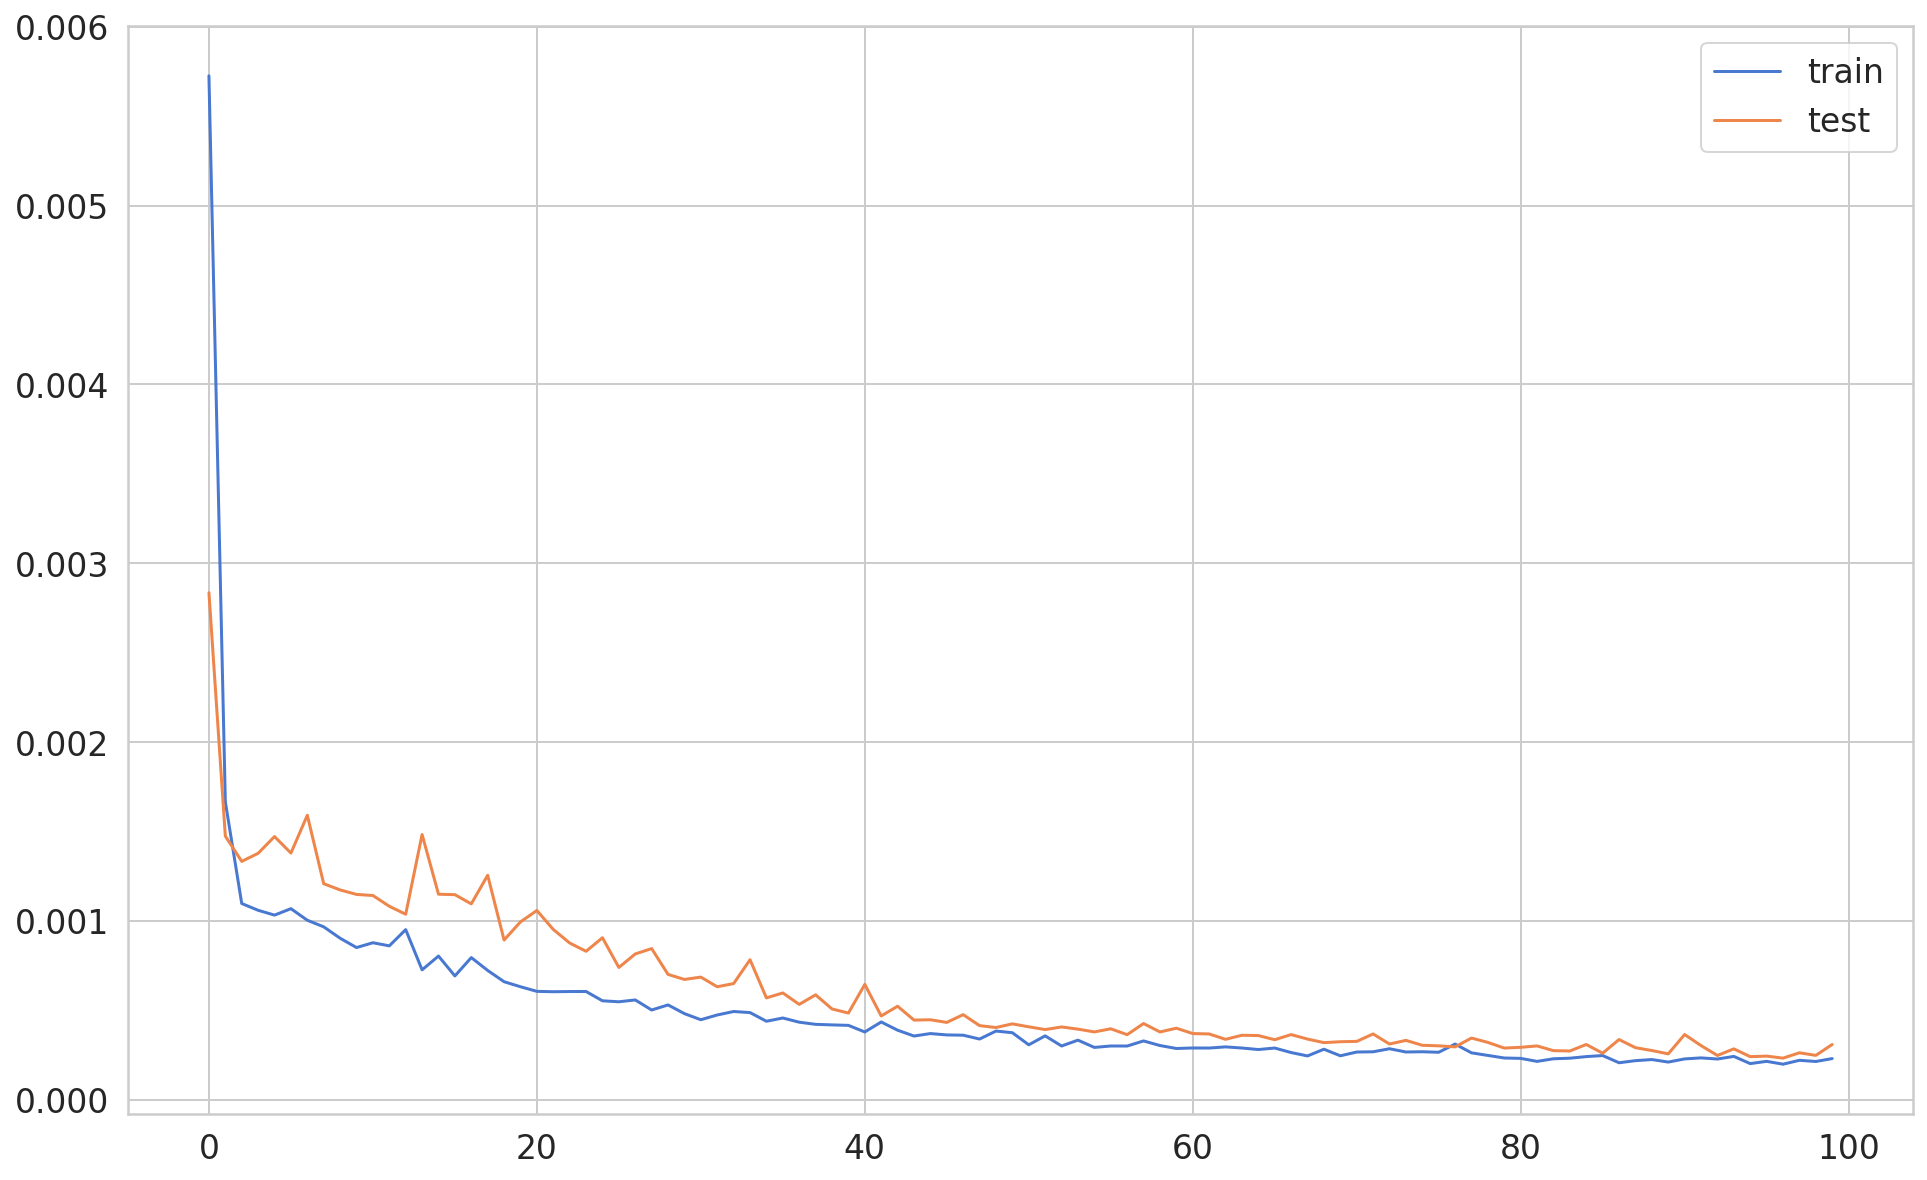

In [187]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend();

In [188]:
y_pred = model.predict(X_test)
y_pred = scaler.inverse_transform(y_pred)

y_test = np.reshape(y_test, (y_test.shape[0], 1))
y_test.shape

y_train = np.reshape(y_train, (y_train.shape[0], 1))
y_train.shape

y_test = scaler.inverse_transform(y_test)
y_train = scaler.inverse_transform(y_train)

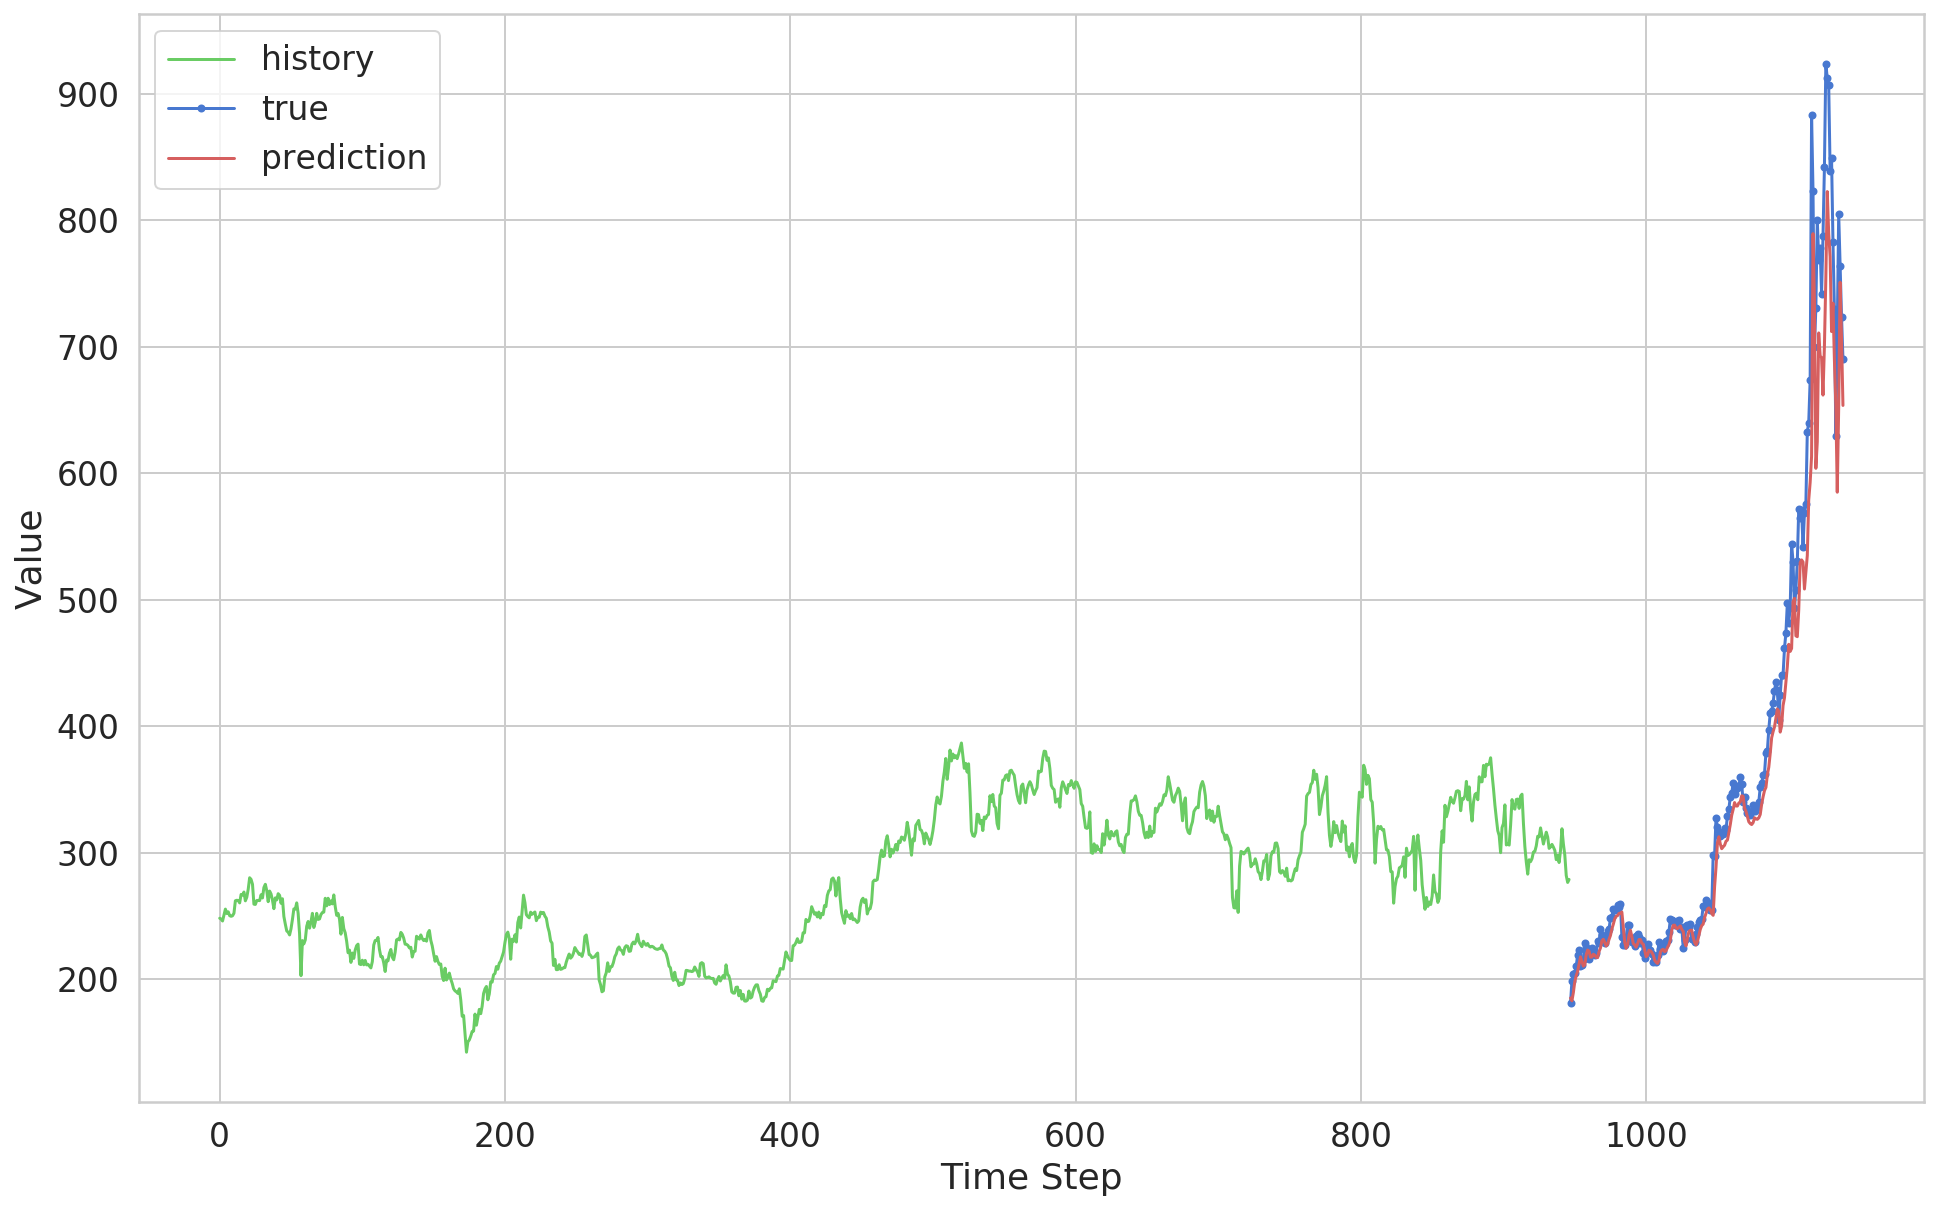

In [189]:
plt.plot(np.arange(0, len(y_train)), y_train, 'g', label="history")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_test, marker='.', label="true")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_pred, 'r', label="prediction")
plt.ylabel('Value')
plt.xlabel('Time Step')
plt.legend()
plt.show();

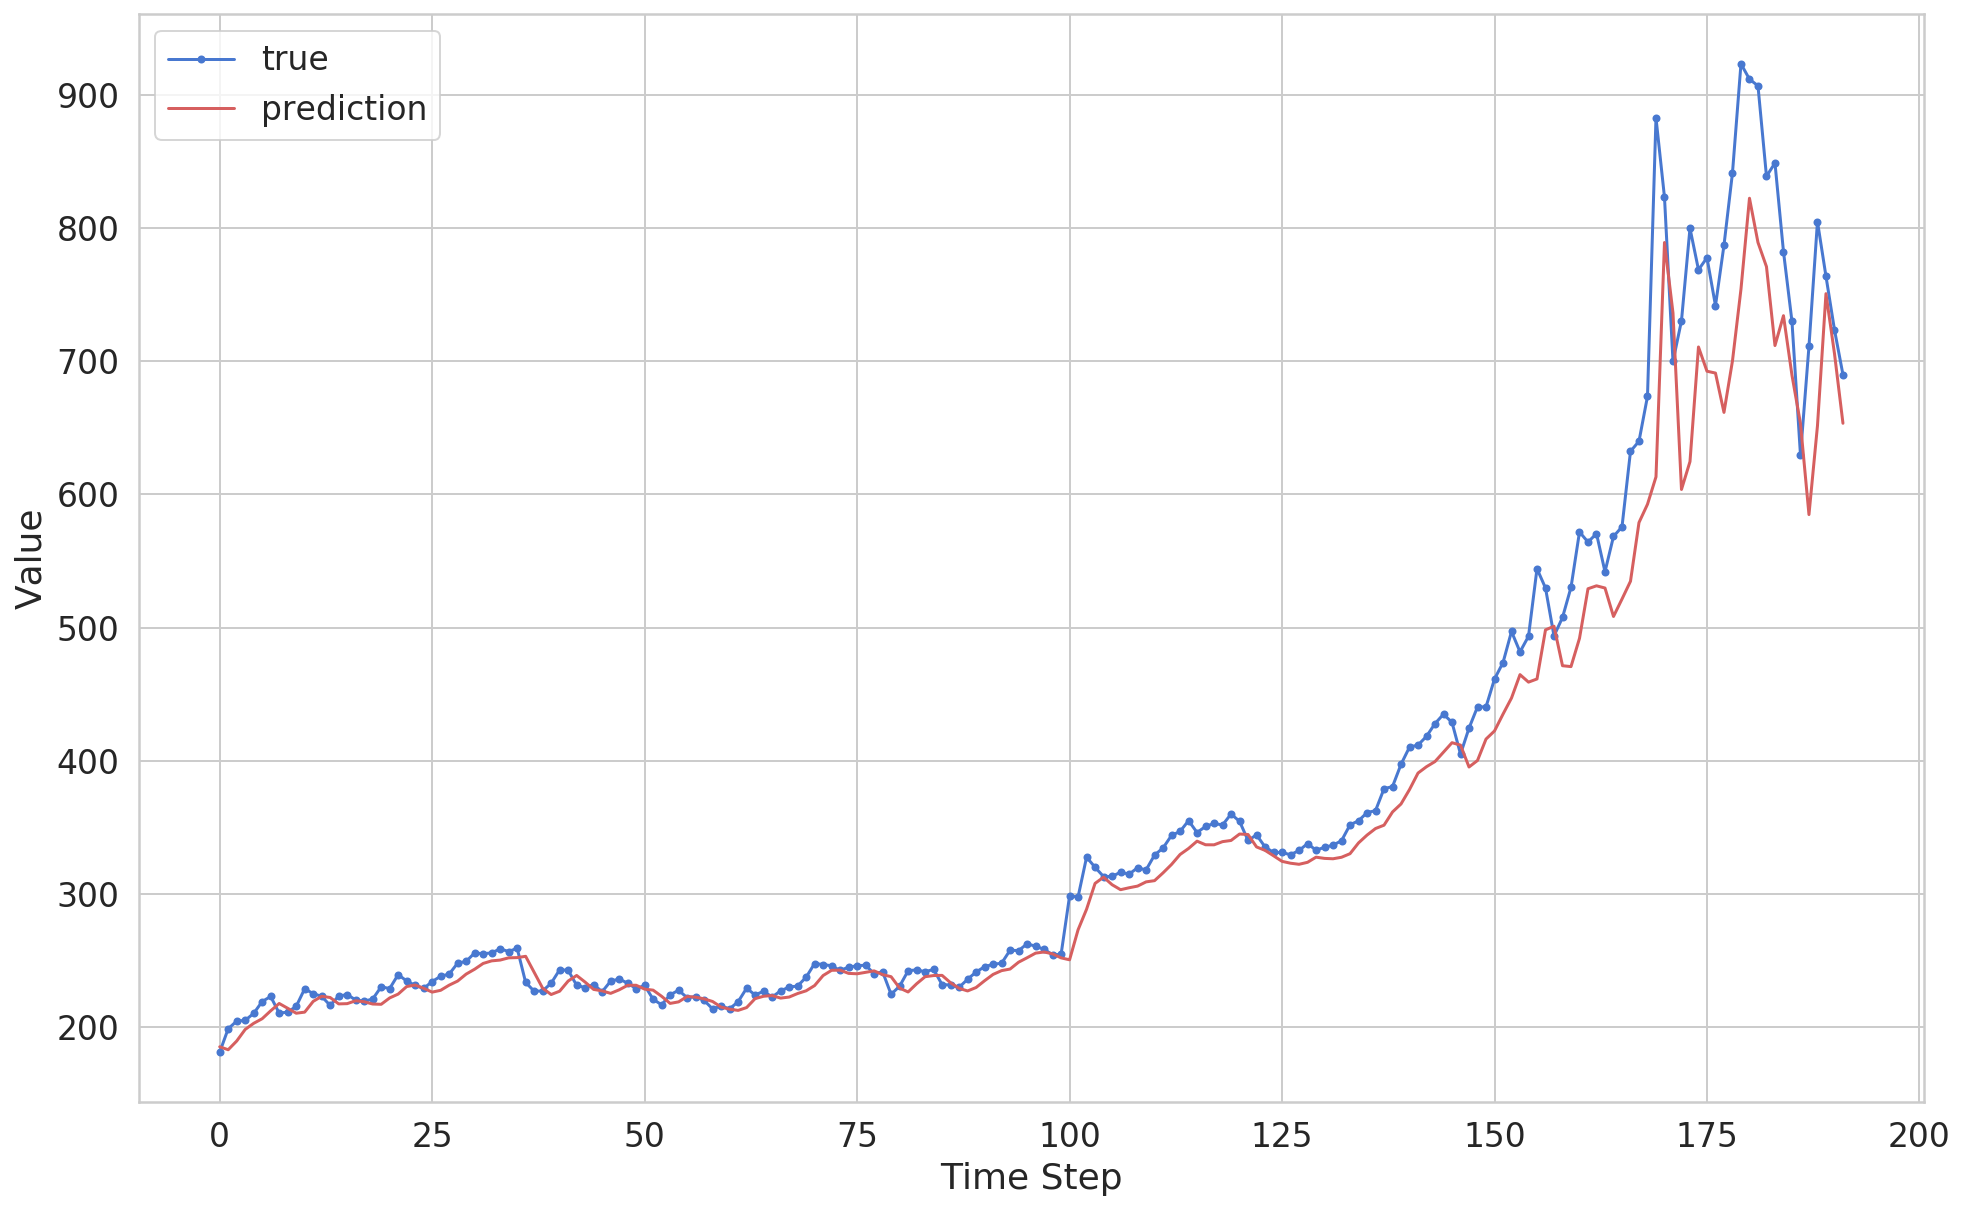

In [190]:
plt.plot(y_test, marker='.', label="true")
plt.plot(y_pred, 'r', label="prediction")
plt.ylabel('Value')
plt.xlabel('Time Step')
plt.legend()
plt.show();